In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读取图像并转换为RGB
src = cv.imread(r"D:\MyProject\CV\CV2\pipes-5.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
 
# 获取图像尺寸
height, width = src.shape[:2]
print(height, width)

465 826


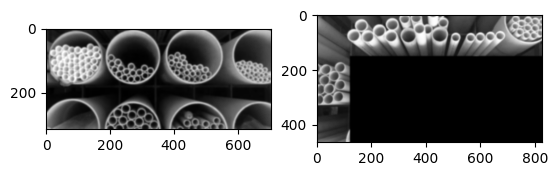

In [3]:
# 定义矩形区域
rect_top_left = (120, 150)
rect_bottom_right = (826, 465)
 
# 提取矩形区域和其他区域
rectangle = src[rect_top_left[1]:rect_bottom_right[1], rect_top_left[0]:rect_bottom_right[0]]
mask = np.zeros(src.shape[:2], dtype=np.uint8)
cv.rectangle(mask, rect_top_left, rect_bottom_right, color=255, thickness=-1)
other_area = cv.bitwise_and(src, src, mask=cv.bitwise_not(mask))
 
# 转换为灰度图并应用高斯模糊
gray1 = cv.cvtColor(rectangle, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(other_area, cv.COLOR_BGR2GRAY)
gray1 = cv.GaussianBlur(gray1, (11, 11), 0)
gray2 = cv.GaussianBlur(gray2, (11, 11), 0)


fig, axs = plt.subplots(1, 2)
axs[0].imshow(gray1, cmap='gray')
axs[1].imshow(gray2, cmap='gray')
plt.show()

Total pipes:  238


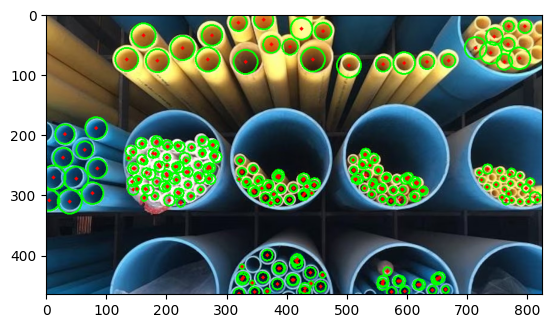

In [4]:
# 使用HoughCircles检测圆
detected_circles1 = cv.HoughCircles(
    gray1, cv.HOUGH_GRADIENT, dp=1.2, minDist=2,
    param1=100, param2=13, minRadius=2, maxRadius=10
)
detected_circles2 = cv.HoughCircles(
    gray2, cv.HOUGH_GRADIENT, dp=1.9, minDist=25,
    param1=86, param2=37, minRadius=5, maxRadius=21
)

image = src.copy()
pipes1 = 0
pipes2 = 0

if detected_circles1 is not None:
    detected_circles_rectangle = np.uint16(np.around(detected_circles1))
    for points in detected_circles_rectangle[0, :]:
        a, b, r = points[0] + rect_top_left[0], points[1] + rect_top_left[1], points[2]
        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)
        pipes1 += 1

if detected_circles2 is not None:
    detected_circles_other = np.uint16(np.around(detected_circles2))
    for points in detected_circles_other[0, :]:
        a, b, r = points[0], points[1], points[2]
        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)
        pipes2 += 1

total_pipes = pipes1 + pipes2
print("Total pipes: ", total_pipes)

plt.imshow(image)
plt.show()